# Business Understanding

For this project, I was interested in finding out more about stack overflow usage and community participation using the Stack Overflow 2020 questionnaire conducted by stack overflow. This project answered some questions bothering on how welcome respondents felt compared to the previous year, their preference on relaxation of restrictions on off-topic, the precentage of respondents with stack over flow account and those that see themselves as a member of the stack overflow community. Additionally, I assess the percentage of the respondents who uses stack overflow as an option when stucked. Below are the five questions answered in this project:

1. How many of the respondents have a stack overflow account, as well as see themselves as a member of the stack overflow community?
2. What is the most visited stack overflow sites by the respondents?
3. How well does stack overflow ranks in terms of the options used by the respondents when stucked?
4. The views of respondents as regards the relaxation of restriction on what is considered off-topic
5. Did respondents feel welcomed compared in 2020 to the previous year (2019) on the platform?

# A Look at the Data

Firstly, we read in the data and import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import split_functions as s
import io
from zipfile import ZipFile


%matplotlib inline


In [2]:
def read_zip(zip_fn, extract_fn=None):
    '''
    Function to read in file from the zipped folder containing the data
    
    '''
    zf = ZipFile(zip_fn)
    if extract_fn:
        return zf.read(extract_fn)
    else:
        return {name:zf.read(name) for name in zf.namelist()}
#Read in the survey function using the fuction defined above
survey = pd.read_csv(io.BytesIO(read_zip('developer_survey_2020.zip', 'survey_results_public.csv')))

In [3]:
#A look at the number of columns and rows in the survey data
survey.shape

(64461, 61)

In [4]:
#Filter the data for developers
survey_dev = survey[(survey.MainBranch == "I am a developer by profession") | (survey.MainBranch == "I am not primarily a developer, but I write code sometimes as part of my work")]
survey_dev.shape

(52695, 61)

In [6]:
#A look at the data columns, non-null count and data type
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

The questionnaire was designed by stackoverflow such that some fields were optional. Hence, not all the available columns were filled by respondents.
We have some missing values in the columns of interest which will be replaced with zeroes. This is done so as not to totally discard the repondents in the data, but their choices are marked as no option in the analysis. 

There is no categorical columns encoding done in this project as there is no need for such.

# Data Exploration: Having a view of the demographics of the respondents

I am a developer by profession                                                   0.735529
I am a student who is learning to code                                           0.124217
I am not primarily a developer, but I write code sometimes as part of my work    0.085752
I code primarily as a hobby                                                      0.036065
I used to be a developer by profession, but no longer am                         0.018438
Name: MainBranch, dtype: float64
(64162, 61)


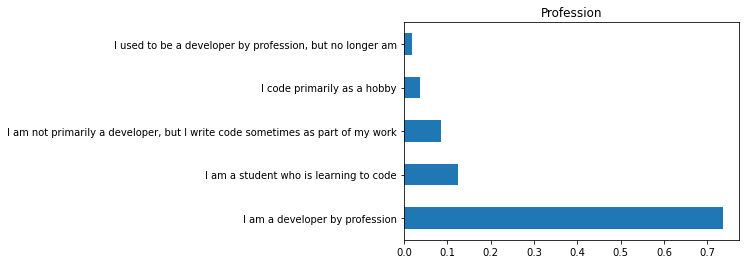

In [20]:
#Chart showing the respondents by their response to whether they are developers or not
s.col_plot(survey, 'MainBranch', 'Profession')

# About 82% of respondents are developers

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.462155
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.228309
Some college/university study without earning a degree                                0.126047
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.083074
Associate degree (A.A., A.S., etc.)                                                   0.032091
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.029427
Primary/elementary school                                                             0.016385
Professional degree (JD, MD, etc.)                                                    0.013930
I never completed any formal education                                                0.008584
Name: EdLevel, dtype: float64
(57431, 61)


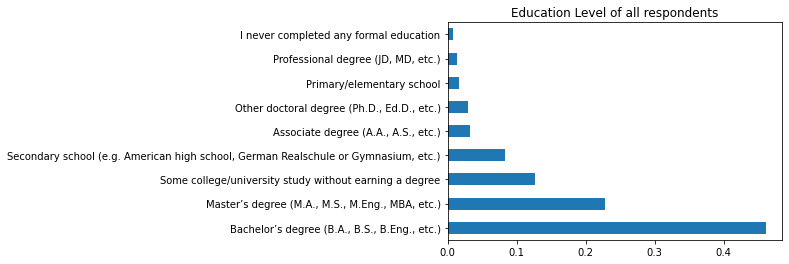

In [10]:
#Chart showing the respondents by their response to their Education Level
s.col_plot(survey, 'EdLevel', 'Education Level of all respondents')

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.493025
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.255404
Some college/university study without earning a degree                                0.114863
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.045262
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.032737
Associate degree (A.A., A.S., etc.)                                                   0.032025
Professional degree (JD, MD, etc.)                                                    0.014494
I never completed any formal education                                                0.006807
Primary/elementary school                                                             0.005383
Name: EdLevel, dtype: float64
(47744, 61)


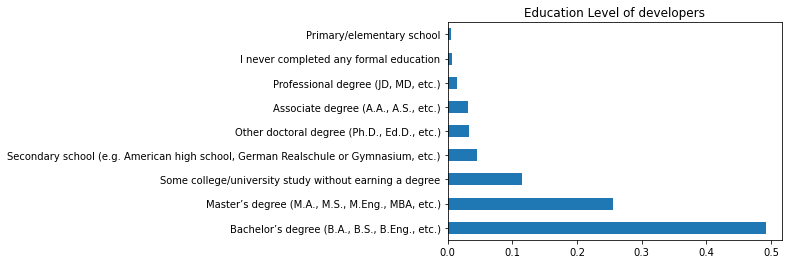

In [28]:
#Chart showing the Education Level of developers in the survey
s.col_plot(survey_dev, 'EdLevel', 'Education Level of developers')

# Approximately 75% of respondents completed at least the minimum of a bachelor's degree or higher; while 78% of professional developers who filled the questionnaire have a minimum of bachelors degree

Employed full-time                                      0.708961
Student                                                 0.121950
Independent contractor, freelancer, or self-employed    0.088828
Not employed, but looking for work                      0.036693
Employed part-time                                      0.034720
Not employed, and not looking for work                  0.005043
Retired                                                 0.003806
Name: Employment, dtype: float64
(63854, 61)


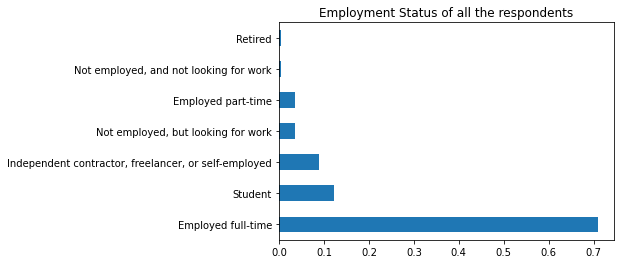

In [11]:
#Chart showing the respondents by Employment Status
s.col_plot(survey, 'Employment', 'Employment Status of all the respondents')

Employed full-time                                      0.827726
Independent contractor, freelancer, or self-employed    0.095494
Employed part-time                                      0.031201
Student                                                 0.021348
Not employed, but looking for work                      0.021157
Not employed, and not looking for work                  0.001795
Retired                                                 0.001279
Name: Employment, dtype: float64
(52370, 61)


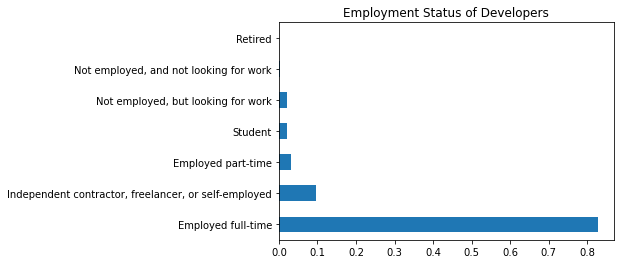

In [12]:
#Chart showing the developers by Employment Status
s.col_plot(survey_dev, 'Employment', 'Employment Status of Developers')

# About 95% of professional developers are atleast employed  

# Answers to Business Question

### Q1. How many of the Respondents have Stackoverflow Account and consider themselves as a member of the Stackoverflow community?

Even though registration is not required to participate on Stack Exchange; you can read, answer, and suggest edits as an anonymous user, much like on Wikipedia.

Yes                        0.832233
No                         0.107403
Not sure/can't remember    0.060364
Name: SOAccount, dtype: float64
(56805, 61)


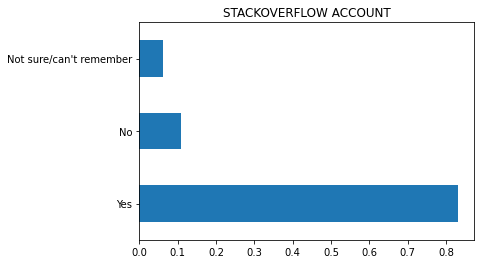

In [13]:
s.col_plot(survey, 'SOAccount', 'STACKOVERFLOW ACCOUNT')

More than 70% of the respondents mentioned that they do have a stack overflow account. 
However, about 40% of the respondents stated that they do consider themselves as members of the stack overflow community.

Yes, somewhat      0.270433
No, not really     0.259792
Neutral            0.207486
Yes, definitely    0.158297
No, not at all     0.085488
Not sure           0.018503
Name: SOComm, dtype: float64
(56476, 61)


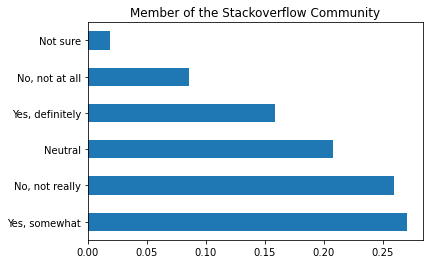

In [14]:
s.col_plot(survey, 'SOComm', 'Member of the Stackoverflow Community')

Yes, somewhat      0.273238
No, not really     0.259353
Neutral            0.200536
Yes, definitely    0.166038
No, not at all     0.085558
Not sure           0.015277
Name: SOComm, dtype: float64
(46670, 61)


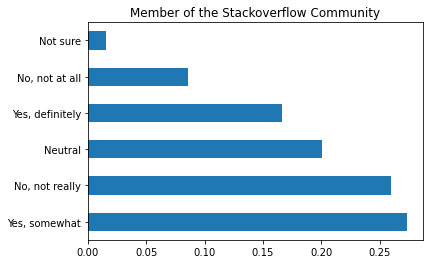

In [15]:
s.col_plot(survey_dev, 'SOComm', 'Member of the Stackoverflow Community')


This means that it’s not everyone that has a stack overflow account that do consider him/herself as a member of the stack overflow community.
These persons may probably just have the account without making any contribution on the platform.

### Q2. Compared to last year, how welcome do you feel on Stack Overflow?

Stack Overflow is intended to be an inclusive place where every programmer can participate. It was one of founder’s earliest decisions. But it’s built on mechanics and norms that push people away if they don’t know the ins-and-outs. Too often, someone comes here to ask a question, only to be told that they did it wrong.

Just as welcome now as I felt last year                    0.706129
Somewhat more welcome now than last year                   0.095287
A lot more welcome now than last year                      0.060836
Somewhat less welcome now than last year                   0.058748
A lot less welcome now than last year                      0.040449
Not applicable - I did not use Stack Overflow last year    0.038551
Name: WelcomeChange, dtype: float64
(52683, 61)


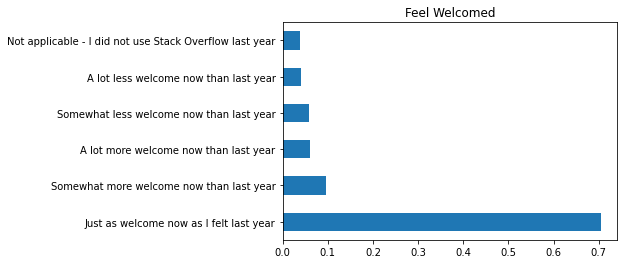

In [16]:
#Chart showing the respondents if they feel more welcome in 2020 than last year
s.col_plot(survey, 'WelcomeChange', 'Feel Welcomed')

About 59% of the respondents do not feel more welcome than they felt last year, with just 1.5% feeling somewhat & more welcome than last year. More effort needs to be put into making users more welcome on the platform.

### Q3. Do you think Stack Overflow should relax restrictions on what is considered off-topic?

Stack Overflow only accepts questions about programming that are tightly focused on a specific problem. Questions of a broader nature–or those inviting answers that are inherently a matter of opinion– are usually rejected by the site's users, and marked as closed in which there have been some report on instances of unfair closures, unrelated duplicates, downvotes without an explanation; 

Not sure    0.397862
No          0.364696
Yes         0.237442
Name: NEWOffTopic, dtype: float64
(50804, 61)


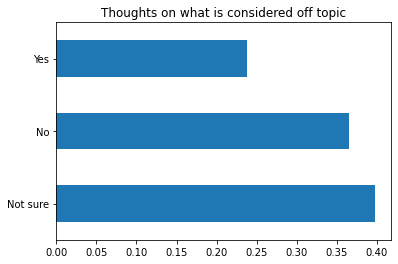

In [17]:
#Chart showing the respondents thoughts on cancellation of what is considered off topic
s.col_plot(survey, 'NEWOffTopic', 'Thoughts on what is considered off topic')

About 60% of respondents answered that they were either neutral or do not think there’s a need for relaxation on what is considered off topic on the platform. Even though about 20% of the respondents feels there should be some sort of relaxation on what is considered off topic, detailed questions/insight needs to be gathered on the users’ requirements/experiences.

### Q4. What is the most visited Stackoverflow site?
In 2009, they started creating additional sites based on the Stack Overflow model. In 2016, Stack Exchange added a variety of new sites which pushed the boundaries of the typical question-and-answer site. 

The number of options in NEWSOSites is 7.


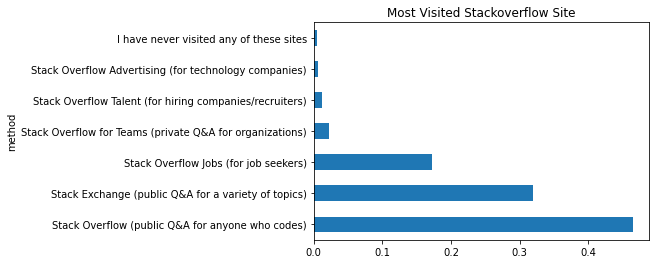

,count
method,
Stack Overflow (public Q&A for anyone who codes),0.464825
Stack Exchange (public Q&A for a variety of topics),0.319186
Stack Overflow Jobs (for job seekers),0.171935
Stack Overflow for Teams (private Q&A for organizations),0.021413
Stack Overflow Talent (for hiring companies/recruiters),0.011532
Stack Overflow Advertising (for technology companies),0.006812
I have never visited any of these sites,0.004297


In [18]:
s.clean_and_plot(survey)

The most visited sites by the respondents are Stack Overflow (public Q&A for anyone who codes) and stack exchange (public Q&A for a variety of topics). 

### Q5. What is the most used option when stucked on a problem?

The number of options in NEWStuck is 9.


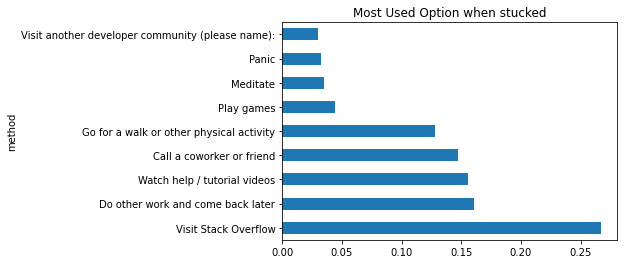

,count
method,
Visit Stack Overflow,0.267317
Do other work and come back later,0.160558
Watch help / tutorial videos,0.155711
Call a coworker or friend,0.147203
Go for a walk or other physical activity,0.127746
Play games,0.044362
Meditate,0.034567
Panic,0.032264
Visit another developer community (please name):,0.030273


In [19]:
s.clean_and_plot(survey, 'NEWStuck', title = "Most Used Option when stucked")

26.7% of respondents did mention that they do visit stack overflow whenever they are stuck.

# FINDINGS

Even though more than 70% of the respondents did mention that they do have a stack overflow account, just about 40% do consider themselves as a member of the stack overflow community. Participation of the respondents on stack overflow appears to be low. Other metrics also point to the fact that most do not feel more welcomed than they were last year albeit with more people neutral or not interested in relaxation of off-topics. However, a look at the off-topic should be considered with a significant number of the respondents mentioning that they would like some sort of relaxations on what is considered off topic. This likely will help to drive participation and community.